<a href="https://colab.research.google.com/github/kiboiWanjohi/scotep-kenya/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp /content/drive/MyDrive/Stat_Docs/kaggle.json ~/.kaggle/kaggle.json

In [5]:
# Change permission
! chmod 600 ~/.kaggle/kaggle.json

### Try Downloading Dataset

Link to dataset https://www.kaggle.com/datasets/cheddad/miniddsm2?resource=download-directory



In [6]:
! kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/healthcare-dataset-2019-2024                  Healthcare Dataset (2019-2024)                       3MB  2024-08-09 17:52:25           3280         75  1.0              
berkayalan/paris-2024-olympics-medals                          Paris 2024 Olympics Medals                           1KB  2024-08-14 11:02:45           1296         33  1.0              
parthdande/movies-box-office-collection-data-2000-2024         Movies Box Office Collection Data 2000-2024        161KB  2024-08-15 07:31:34            704         21  1.0              
arpit2712/amazonsalesreport                                    AmazonS

In [7]:
!kaggle datasets download -d cheddad/miniddsm2

Dataset URL: https://www.kaggle.com/datasets/cheddad/miniddsm2
License(s): Attribution-NoDerivatives 4.0 International (CC BY-ND 4.0)
100% 49.1G/49.1G [10:47<00:00, 88.8MB/s]
100% 49.1G/49.1G [10:47<00:00, 81.4MB/s]


In [8]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   80G   28G  75% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
tmpfs           6.4G  104K  6.4G   1% /var/colab
/dev/sda1       114G   82G   33G  72% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  2.7G   13G  18% /content/drive


In [ ]:
cd '/content/miniddsm2.zip'

[Errno 20] Not a directory: '/content/miniddsm2.zip'
/content


In [9]:
# unzip entire content
# unzip "/content/miniddsm2.zip"

!unzip -j miniddsm2.zip 'MINI-DDSM-Complete-JPEG-8/*' -d ./MINI-DDSM-Complete-JPEG-8/

Streaming output truncated to the last 5000 lines.
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3403_1.LEFT_CC.jpg  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3403_1.LEFT_MLO.jpg  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3403_1.RIGHT_CC.OVERLAY  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3403_1.RIGHT_CC.jpg  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3403_1.RIGHT_CC_Mask.jpg  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3403_1.RIGHT_MLO.OVERLAY  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3403_1.RIGHT_MLO.jpg  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3403_1.RIGHT_MLO_Mask.jpg  
  inflating: ./MINI-DDSM-Complete-JPEG-8/TAPE_B_3403_1.COMB.16_PGM  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B-3405-1.ics  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3405_1.LEFT_CC.OVERLAY  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3405_1.LEFT_CC.jpg  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3405_1.LEFT_CC_Mask.jpg  
  inflating: ./MINI-DDSM-Complete-JPEG-8/B_3405_1.LEFT_MLO.OVERLAY  
  inflating: .

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np

In [11]:
dicom_data = pd.read_excel('/content/Data-MoreThanTwoMasks/Data-MoreThanTwoMasks.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/Data-MoreThanTwoMasks/Data-MoreThanTwoMasks.xlsx'

In [ ]:
dicom_data.head()

,fullPath,fileName,View,Side,Status,Age,Density,Tumour_Contour,Tumour_Contour2,Tumour_Contour3,Tumour_Contour4,Tumour_Contour5,Tumour_Contour6
0,Benign\0029\C_0029_1.LEFT_CC.png,C_0029_1.LEFT_CC.png,CC,LEFT,Benign,66.0,3,Benign\0029\C_0029_1.LEFT_CC_Mask.png,-,NaN,NaN,NaN,NaN
1,Benign\0029\C_0029_1.LEFT_MLO.png,C_0029_1.LEFT_MLO.png,MLO,LEFT,Benign,66.0,3,Benign\0029\C_0029_1.LEFT_MLO_Mask.png,-,NaN,NaN,NaN,NaN
2,Benign\0029\C_0029_1.RIGHT_CC.png,C_0029_1.RIGHT_CC.png,CC,RIGHT,Benign,66.0,3,-,-,NaN,NaN,NaN,NaN
3,Benign\0029\C_0029_1.RIGHT_MLO.png,C_0029_1.RIGHT_MLO.png,MLO,RIGHT,Benign,66.0,3,-,-,NaN,NaN,NaN,NaN
4,Benign\0033\C_0033_1.LEFT_CC.png,C_0033_1.LEFT_CC.png,CC,LEFT,Benign,60.0,3,-,-,NaN,NaN,NaN,NaN


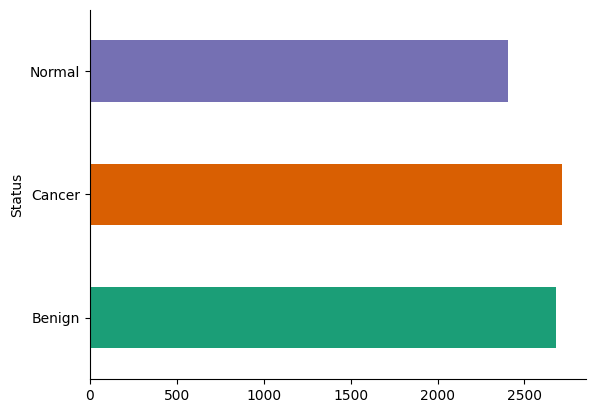

In [ ]:
# title Status

from matplotlib import pyplot as plt
import seaborn as sns
dicom_data.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def Normalization(image):
  normalized_image = (image - image.min()) / (image.max() - image.min())
  return normalized_image

In [12]:
cancer = ['/content/MINI-DDSM-Complete-JPEG-8/Cancer' + i for i in os.listdir('/content/MINI-DDSM-Complete-JPEG-8/Cancer')]
normal = ['/content/MINI-DDSM-Complete-JPEG-8/Normal' + i for i in os.listdir('/content/MINI-DDSM-Complete-JPEG-8/Normal')]
benign = ['/content/MINI-DDSM-Complete-JPEG-8/Benign' + i for i in os.listdir('/content/MINI-DDSM-Complete-JPEG-8/Benign')]

FileNotFoundError: [Errno 2] No such file or directory: '/content/MINI-DDSM-Complete-JPEG-8/Cancer'

In [ ]:
print(f"Cancer: {len(cancer)}, Normal: {len(normal)}, Benign: {len(benign)}")

Cancer: 679, Normal: 602, Benign: 671


In [ ]:

# Create an array that will contain 2000 images, each resized to 360x200 pixels with 3 color channels (RGB)
x = np.zeros((2000, 360, 200, 3))

# Create an array that will contain the labels
y = np.zeros((2000, 1))

def Normalization(image):
    return image / 255.0  # Assuming Normalization is a function that normalizes the image

for i in range(500):
    img_cancer = cv2.imread(cancer[i])
    img_normal = cv2.imread(normal[i])
    img_benign = cv2.imread(benign[i])

    if img_cancer is not None:
        x[i] = Normalization(cv2.resize(img_cancer, (360, 200)))
    else:
        print(f"Error loading image: {cancer[i]}")

    if img_normal is not None:
        x[i+500] = Normalization(cv2.resize(img_normal, (360, 200)))
    else:
        print(f"Error loading image: {normal[i]}")

    if img_benign is not None:
        x[i+1000] = Normalization(cv2.resize(img_benign, (360, 200)))
    else:
        print(f"Error loading image: {benign[i]}")

    # Track progress in the loop
    if i % 100 == 0:
        print(f"Processed {i} images")

# Assign labels: 1 for the first 1000 images (cancer), 0 for the next 1000 images (normal/benign)
for i in range(1000):
    y[i] = 1
    y[i+1000] = 0

# One-hot encode the labels
y = tf.keras.utils.to_categorical(y, num_classes=2)


Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Cancer1728
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Normal2009
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Benign1763
Processed 0 images
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Cancer1874
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Normal0274
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Benign1711
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Cancer1490
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Normal0606
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Benign4064
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Cancer3389
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Normal0435
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Benign0274
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Cancer1696
Error loading image: /content/MINI-DDSM-Complete-JPEG-8/Normal0707
Error loading image: /content/MINI-DDSM-Com

In [ ]:
print(x.shape)
print(y.shape)

(2000, 360, 200, 3)
(2000, 2)


In [ ]:
# Split 20% of the data for testing
x_, x_test, y_, y_test = train_test_split(x, y, test_size=0.2)

# Split 10% of the remaining data for validation (8%)
x_train, x_val, y_train, y_val = train_test_split(x_, y_, test_size=0.1)


In [ ]:
print(f"x shape: {len(x_)}, x_test: {len(x_test)},  x_val: {len(x_val)}")
print(f"y shape: {len(y_)}, y_test: {len(y_test)},  y_val: {len(y_val)}")

x shape: 1600, x_test: 400,  x_val: 160
y shape: 1600, y_test: 400,  y_val: 160


#### ResNet Model

Residual Network

Skip Connections: connections allow the network to bypass one or more layers, enabling the gradient to flow directly through the network.

Residual Blocks: instead of learning the desired output directly, the network learns the residual (difference) between the input and the output.

ResNet-34, ResNet-50, ResNet-101: have 34, 50, and 101 layers, respectively.

In [ ]:
base_model = tf.keras.applications.ResNet50(include_top=False, weights=None, input_shape=(360, 200, 3), pooling = 'max')
base_model.trainable = True

In [ ]:
# ResNet-50 model
def build_resnet50_model():
  x = base_model.output
  x = Dense(1024, activation='relu')(x)
  x = Dense(512, activation='relu')(x)
  x = Dense(128, activation='relu')(x)
  x = Dense(32, activation='relu')(x)
  x = Dense(8, activation='relu')(x)
  Output = Dense(2, activation='softmax')(x)
  model = Model(inputs=base_model.input, outputs=Output)
  return model

model = build_resnet50_model()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 360, 200, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 366, 206, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 180, 100, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 180, 100, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 180, 100, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 182, 102, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 90, 50, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 90, 50, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 90, 50, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 90, 50, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 90, 50, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 90, 50, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 90, 50, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 90, 50, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 90, 50, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 26,280,762 (100.25 MB)

 Trainable params: 26,227,642 (100.05 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.000001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20


In [ ]:
# plot epochs vs loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
label_map = {0: 'normal', 1: 'cancer'}

def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array, 0)
  predictions = model.predict(img_array)
  predicted_class = label_map[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

# predict_cnn = model.predict(x_train)
# pred_label_model = np.argmax(predict_cnn, axis = 1)

# cm = confusion_matrix(np.argmax(y_train, axis = 1), pred_label_model)
# cmd = ConfusionMatrixDisplay(cm, display_labels=label_map.values())
# print((pred_label_model == np.argmax(y_train, axis = 1)).sum()/len(pred_label_model) * 100)


# fig, ax = plt.subplots(figsize=(10, 10))
# cmd.plot(ax = ax)
# plt.plot('Training Accuracy')
# plt.show()
# print(classification_report(np.argmax(y_train, axis = 1), pred_label_model, target_names=label_map.values()))


#### VGG-16

Visual Geometry Group (VGG)
Consists of 16 layers, including 13 convolutional layers and 3 fully connected layers.

Achieves high accuracy on image classification tasks, such as the ImageNet dataset
Large model size


In [3]:
base_vgg = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(360, 200, 3), pooling = 'max')
base_vgg.trainable = True

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def vgg16_model():
  x = base_vgg.output
  x = Dense(128, activation='relu')(x)
  x = Dense(32, activation='relu')(x)
  x = Dense(8, activation='relu')(x)
  Output = Dense(2, activation='softmax')(x)
  model = Model(inputs=base_vgg.input, outputs=Output)
  return model
vgg16 = vgg16_model()
vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 360, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 360, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 360, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 180, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 180, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 180, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 90, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 90, 50, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 90, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 90, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 45, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 45, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 45, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 45, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 22, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 22, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 22, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 22, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 11, 6, 512)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,6

 Total params: 14,784,762 (56.40 MB)

 Trainable params: 14,784,762 (56.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_vgg = vgg16.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

In [ ]:
# plot vgg confusion matrix
label_map = {0: 'normal', 1: 'abnormal'}
predict_vgg = vgg.predict(x_train)
pred_label_model = np.argmax(predict_cnn, axis = 1)

cm = confusion_matrix(np.argmax(y_train, axis = 1), pred_label_model)
cmd = ConfusionMatrixDisplay(cm, display_labels=label_map.values())
print((pred_label_model == np.argmax(y_train, axis = 1)).sum()/len(pred_label_model) * 100)


fig, ax = plt.subplots(figsize=(10, 10))
cmd.plot(ax = ax)
plt.plot('Training Accuracy')
plt.show()
print(classification_report(np.argmax(y_train, axis = 1), pred_label_model, target_names=label_map.values()))

In [ ]:
# plot epochs vs loss
